<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula02d_regress%C3%A3o_eq_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.plot(X[:,0], y, 'o', alpha=0.3)
  plt.xlim(0, 1)
  plt.ylim(0, 1)


(20, 1)
(20,)


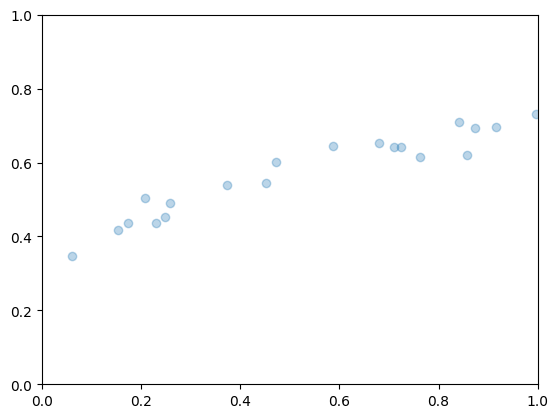

In [104]:
import numpy as np

def criaDatasetRegressao(n=20, slop=0.5, intercept=0.2):
  X = np.random.uniform(size=(n,1))
  AUX = np.random.rand(n,1)-0.5
  y = X**0.4 * slop + intercept + AUX*0.1
  print(y.shape)
  y = y.flatten()
  print(y.shape)
  return X, y

X, y = criaDatasetRegressao()
plotDataset(X, y)
plt.show()

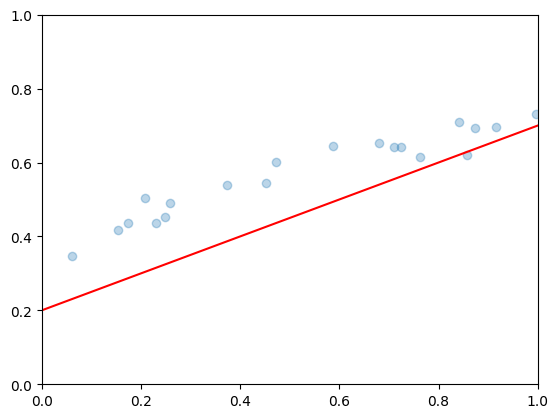

In [105]:
def plotRegression(slop, intercept):
  xs = np.array([0, 1])
  ys = xs * slop + intercept
  plt.plot(xs, ys, 'r-')

plotDataset(X, y)
plotRegression(0.5, 0.2)
plt.show()

[0.38199175 0.35716386]
0.0010456124456620394


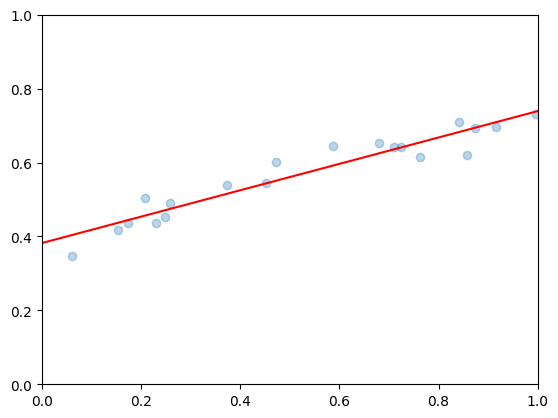

In [106]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, RegressorMixin):
  def fit(self, X, y):
    Xb = include_bias(X)
    # equação normal
    self.w = np.linalg.pinv(Xb) @ y
    return self

  def predict(self, X):
    Xb = include_bias(X)
    return (Xb @ (self.w))

model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(mean_squared_error(y, ypred))
plotDataset(X, y)
plotRegression(model.w[1], model.w[0])
plt.show()

(1000, 1)
(1000,)
0.0015830327251878807


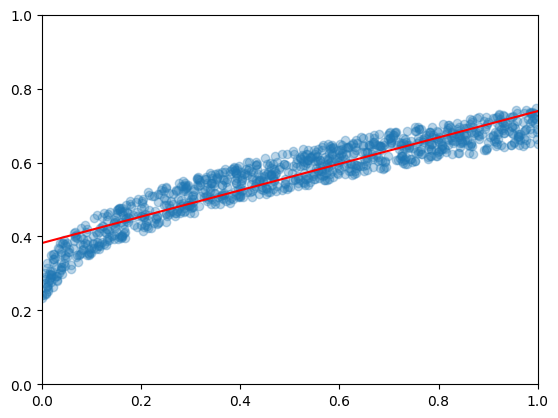

In [107]:
Xtest, ytest = criaDatasetRegressao(1000)
ypred = model.predict(Xtest)
print(mean_squared_error(ytest, ypred))
plotDataset(Xtest, ytest)
plotRegression(model.w[1], model.w[0])
plt.show()